In [63]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx
from PIL import Image

In [64]:
X_full= mpl.pyplot.imread('face.jpeg') #loading image
X_full = X_full.mean(axis=2) #changing it to "grayscale"
X = spimg.zoom(X_full, 1) #downsizing image
height,width = X.shape #getting height and width of image
height*width

65536

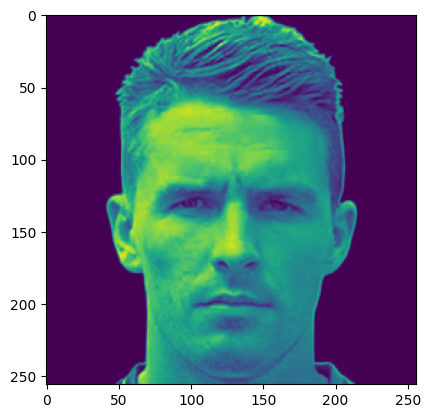

In [65]:
plt.imshow(X)

In [66]:
def dct2 ( x ) :
  return spfft.dct(spfft.dct( x.T , norm = "ortho" , axis = 0).T , norm = "ortho" , axis = 0 )
def idct2 ( x ) :
  return spfft.idct( spfft.idct( x.T , norm = "ortho" , axis = 0 ).T , norm = "ortho" , axis = 0)

In [97]:
Y = dct2(X)
y = Y[:45,:45].flatten()

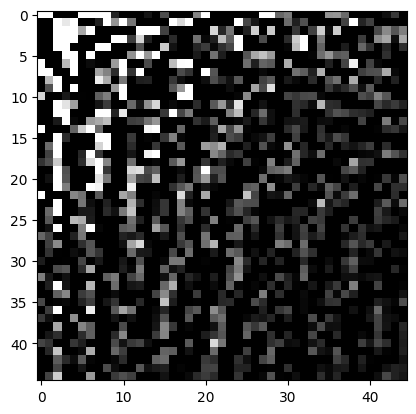

In [98]:
plt.imshow(Image.fromarray(Y[:45, :45]))

In [99]:
A = np.zeros((900,900))
for i in range(900):
  index = np.random.randint(0, 900)
  A[i][index] = 1



In [85]:
A = np.random.randn(900,900)

In [100]:
A = np.random.randint(0,2,(45**2,45**2))

In [101]:
b = A@y

In [102]:
ysparsereal = cvx.Variable(45**2)
obj = cvx.Minimize(cvx.norm(ysparsereal, 1))
constraints = [cvx.norm(A@ysparsereal - b,2) <= 1e-12]
prob = cvx.Problem(obj, constraints)
result = prob.solve()

In [104]:
y_corner = ysparsereal.value
y_corner = y_corner.reshape((45,45))

image = np.zeros((height, width))
image[:45,:45] = y_corner
np.count_nonzero(image)

2025

In [105]:
height*width -1600

63936

63936 there are that many zeros so the solution is very sparse and 1600 non-sparse coefficednts

In [106]:
image = idct2(image)

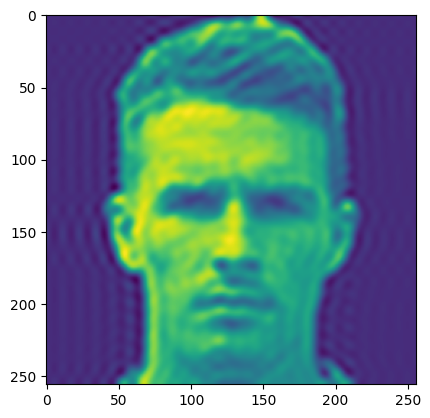

In [107]:
plt.imshow(image)

In [108]:
Y = np.fft.fft2(X)

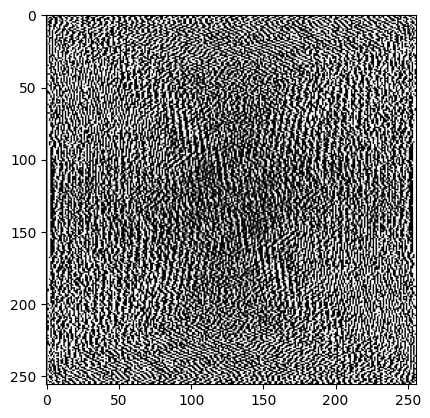

In [72]:
plt.imshow(Y.real)

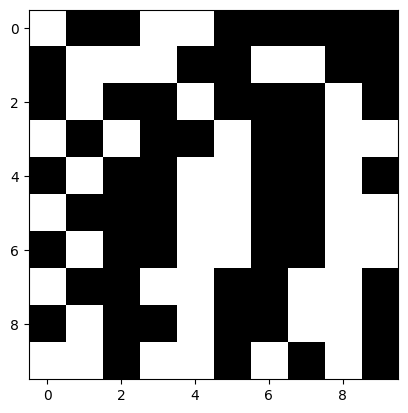

In [74]:
plt.imshow(Image.fromarray(Y[:10, :10].real))

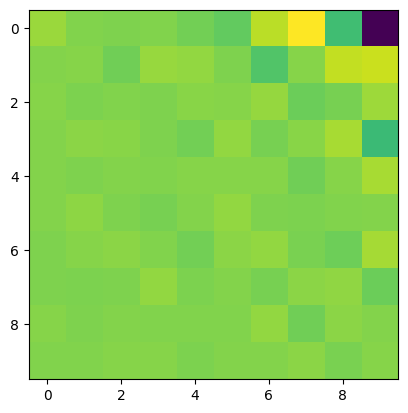

In [45]:
plt.imshow(Y[:10, -10:].real)

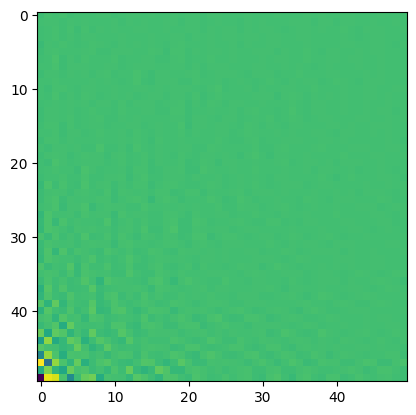

In [48]:
plt.imshow(Y[-50:, :50].real)

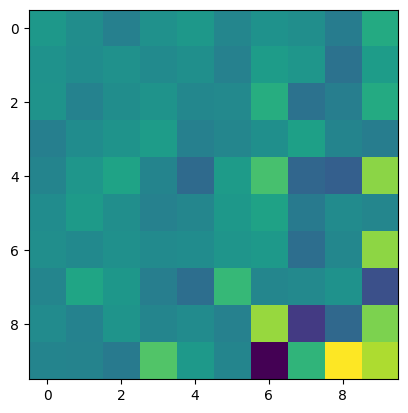

In [47]:
plt.imshow(Y[-10:, -10:].real)

In [51]:
n = 45
yul = Y[:n, :n]
yur = Y[:n, -n:]
yll = Y[-n:, :n]
ylr = Y[-n:, -n:]


Z = np.block([[yul, yur],
              [yll, ylr]])
Z.shape

(90, 90)